In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
inp_dir=r"C:\Users\Ash kan\Documents\watbalpy\waterball_test\modelito_for_paper_tests\v5_modelito_change_zone_5_6_soil_charc\all_regions_and_Total_report.csv"
df=pd.read_csv(inp_dir)


In [3]:
#yearly precipitation
area_pixels_total=135900
df_feats_prec=["Time","REG_1_Prec","REG_2_Prec","REG_3_Prec","REG_4_Prec","REG_5_Prec","REG_6_Prec"]
df_prec=df[df_feats_prec]
df_prec["Time"]=pd.to_datetime(df_prec["Time"])
df_prec.index=df_prec["Time"]
df_prec_yearly=df_prec.resample("1Y").sum()
df_prec_yearly


c:\Users\Ash kan\.conda\envs\pysplitenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,REG_1_Prec,REG_2_Prec,REG_3_Prec,REG_4_Prec,REG_5_Prec,REG_6_Prec
Time,,,,,,
2018-12-31,1042.288538,1296.654660,1341.598401,1058.504929,918.201678,1252.121550
2019-12-31,564.186340,624.825453,633.125534,573.935801,496.030344,664.873605
2020-12-31,936.127818,1471.570413,1452.801792,1237.529622,743.692096,1207.713981
2021-12-31,423.159713,634.570897,608.033975,436.892590,335.443106,438.515825


In [4]:
#yearly recharge

df_feats_rec=["Time","REG_1_Rec","REG_2_Rec","REG_3_Rec","REG_4_Rec","REG_5_Rec","REG_6_Rec"]
df_rec=df[df_feats_rec]
df_rec["Time"]=pd.to_datetime(df_rec["Time"])
df_rec.index=df_rec["Time"]
df_rec_yearly=df_rec.resample("1Y").sum()
df_rec_yearly.to_excel(os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript","waterpybal annual recharge.xls"))
df_rec_yearly

c:\Users\Ash kan\.conda\envs\pysplitenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\Users\Ash kan\.conda\envs\pysplitenv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  


,REG_1_Rec,REG_2_Rec,REG_3_Rec,REG_4_Rec,REG_5_Rec,REG_6_Rec
Time,,,,,,
2018-12-31,64.588102,793.169076,425.405133,92.520957,4.614975,17.558043
2019-12-31,6.289575,598.108795,198.818875,28.813595,0.000000,0.000000
2020-12-31,37.522238,841.382642,432.527768,141.525265,0.855535,19.487894
2021-12-31,0.704579,602.253413,154.854721,4.425444,0.000000,0.000000


In [5]:
def error_calc(empirical_recharge,emp_name,empirical_errors=None):

    n=(np.array(empirical_recharge)-np.array(df_rec_yearly))**2
    RMSE=pd.DataFrame((n.sum(axis=0)/len(n))**1/2,columns=["RMSE_"+emp_name])
    MAE=pd.DataFrame(abs(np.array(empirical_recharge)-np.array(df_rec_yearly)).sum(axis=0)/len(n),columns=["MAE_"+emp_name])
    MAP=pd.DataFrame(abs((np.array(empirical_recharge)-np.array(df_rec_yearly))/np.array(empirical_recharge)).sum(axis=0)*100/len(n),columns=["MAP_"+emp_name])
    RMSE.index=[1,2,3,4,5,6]
    MAE.index=[1,2,3,4,5,6]
    MAP.index=[1,2,3,4,5,6]

    if empirical_errors is None:
        empirical_errors=pd.concat([RMSE,MAE,MAP],axis=1)
    else:
        empirical_errors=pd.concat([empirical_errors,RMSE,MAE,MAP],axis=1)
    return empirical_errors
def rename_df(empirical_recharge,emp_name):
    empirical_recharge=empirical_recharge.rename(columns={"REG_1_Prec": "1_"+emp_name, "REG_2_Prec": "2_"+emp_name,
                                   "REG_3_Prec": "3_"+emp_name, "REG_4_Prec": "4_"+emp_name,
                                   "REG_5_Prec": "5_"+emp_name, "REG_6_Prec": "6_"+emp_name})
    return empirical_recharge

In [6]:
df_prec_yearly

,REG_1_Prec,REG_2_Prec,REG_3_Prec,REG_4_Prec,REG_5_Prec,REG_6_Prec
Time,,,,,,
2018-12-31,1042.288538,1296.654660,1341.598401,1058.504929,918.201678,1252.121550
2019-12-31,564.186340,624.825453,633.125534,573.935801,496.030344,664.873605
2020-12-31,936.127818,1471.570413,1452.801792,1237.529622,743.692096,1207.713981
2021-12-31,423.159713,634.570897,608.033975,436.892590,335.443106,438.515825


In [7]:
#empirical 1 Relationship of Krishna Rao (mm) (Krishna Rao, 1970)
zones=[1,2,3,4,5,6]
empirical_recharge=0.2*(df_prec_yearly-550)
emp_1_dic={1:[0.3,500],
    2:[0.3,500],
    3:[0.3,500],
    4:[0.3,500],
    5:[0.3,500],
    6:[0.3,500]}
for zone in zones:
    zname="REG_"+str(zone)+"_Prec"
    empirical_recharge[zname]= emp_1_dic[zone][0]*(df_prec_yearly[zname]-emp_1_dic[zone][1])
emp_name="emp1"
empirical_recharge=rename_df(empirical_recharge,emp_name)
empirical_errors=error_calc(empirical_recharge,emp_name=emp_name,empirical_errors=None)
empirical_recharge_all=empirical_recharge
##################################
#empirical 2: Modified Chaturvedi Formula (in inch) (Kumar and Seethapathi, 2002)
empirical_recharge=1.35*((df_prec_yearly/2.54)-14)**(0.5)
emp_2_dic={1:[1.35,14,0.5],
    2:[1.35,14,0.5],
    3:[1.35,14,0.5],
    4:[1.35,14,0.5],
    5:[1.35,14,0.5],
    6:[1.35,14,0.5]}
for zone in zones:
    zname="REG_"+str(zone)+"_Prec"
    empirical_recharge[zname]= emp_2_dic[zone][0]*((df_prec_yearly[zname]/2.54)-emp_2_dic[zone][1])**(emp_2_dic[zone][2])
empirical_recharge=empirical_recharge*2.54
emp_name="emp2"
empirical_recharge=rename_df(empirical_recharge,emp_name)
empirical_errors=error_calc(empirical_recharge,emp_name=emp_name,empirical_errors=empirical_errors)
empirical_recharge_all=pd.concat([empirical_recharge_all,empirical_recharge],axis=1)
##################################
#empirical 3: Chaturvedi Formula (in inch) (Chaturvedi, 1973)
empirical_recharge=1*((df_prec_yearly/2.54)-20)**(0.2) #15 to 20
emp_2_dic={1:[2 ,15,0.4],
    2:[2,15,0.4],
    3:[2 ,15,0.4],
    4:[2 ,15,0.4],
    5:[2 ,15,0.4],
    6:[2 ,15,0.4]}
for zone in zones:
    zname="REG_"+str(zone)+"_Prec"
    empirical_recharge[zname]= emp_2_dic[zone][0]*((df_prec_yearly[zname]/2.54)-emp_2_dic[zone][1])**(emp_2_dic[zone][2])
empirical_recharge=empirical_recharge*2.54
emp_name="emp3"
empirical_recharge=rename_df(empirical_recharge,emp_name)
empirical_errors=error_calc(empirical_recharge,emp_name=emp_name,empirical_errors=empirical_errors)
empirical_recharge_all=pd.concat([empirical_recharge_all,empirical_recharge],axis=1)
##################################
#empirical 4: The Maxey-Eakin (1949) method (in mm)
empirical_recharge=df_prec_yearly*0.1
emp_1_dic={1:[0.1],
    2:[0.1],
    3:[0.1],
    4:[0.1],
    5:[0.1],
    6:[0.1]}
for zone in zones:
    zname="REG_"+str(zone)+"_Prec"
    empirical_recharge[zname]= emp_1_dic[zone][0]*(df_prec_yearly[zname])
emp_name="emp4"
empirical_recharge=rename_df(empirical_recharge,emp_name)
empirical_errors=error_calc(empirical_recharge,emp_name=emp_name,empirical_errors=empirical_errors)
empirical_recharge_all=pd.concat([empirical_recharge_all,empirical_recharge],axis=1)
empirical_recharge_all[empirical_recharge_all<0]=0

a=list(empirical_recharge_all.columns.unique())
cols_list=[]
for i in [1,2,3,4,5,6]:
    cols_list.append([n for n in a if n[0]==str(i)])

min_max_df=None
min_max_df_fig=None
for n,i in enumerate(cols_list):
    std_=empirical_recharge_all[i].std(axis=1)
    mean_=empirical_recharge_all[i].mean(axis=1)
    min=empirical_recharge_all[i].min(axis=1)
    max=empirical_recharge_all[i].max(axis=1)
    min_fig=mean_- 2*std_
    max_fig=mean_ +2*std_
    min_max_df_fig_=pd.concat([min_fig,max_fig],axis=1)
    min_max_df_=pd.concat([min,max],axis=1)
    min_max_df_ = min_max_df_.rename(columns={0: 'min_'+str(n+1), 1: 'max_'+str(n+1)})
    min_max_df_fig_ = min_max_df_fig_.rename(columns={0: 'min_'+str(n+1), 1: 'max_'+str(n+1)})

    if min_max_df is None:
        min_max_df=min_max_df_
        min_max_df_fig=min_max_df_fig_

    else:
        min_max_df=pd.concat([min_max_df,min_max_df_],axis=1)
        min_max_df_fig=pd.concat([min_max_df_fig,min_max_df_fig_],axis=1)
min_max_df[min_max_df<0]=0
#min_max_df_fig[min_max_df<0]=0

empirical_recharge_all.to_excel(os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript","empirical annual recharge.xls"))
#print (min_max_df)

c:\Users\Ash kan\.conda\envs\pysplitenv\lib\site-packages\ipykernel_launcher.py:98: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.


In [8]:
min_max_df_fig-min_max_df

,min_1,max_1,min_2,max_2,min_3,max_3,min_4,max_4,min_5,max_5,min_6,max_6
Time,,,,,,,,,,,,
2018-12-31,-53.844515,30.975620,-95.542079,48.681066,-103.001009,51.890759,-56.464364,32.069101,-34.153228,22.947588,-88.171861,45.518473
2019-12-31,-9.533103,17.874725,-9.594076,8.144500,-10.025389,7.225294,-9.302609,16.079473,-11.967469,30.537606,-9.927567,5.401018
2020-12-31,-36.944741,24.056057,-124.668573,61.255120,-121.531769,59.896270,-85.761839,44.486519,-10.349878,14.229302,-80.845803,42.385297
2021-12-31,-10.428839,29.335781,-10.116517,7.081007,-9.126456,10.401739,-10.700585,29.602708,-8.896477,24.108144,-10.733272,29.628988


ValueError: num must be 1 <= num <= 4, not 5

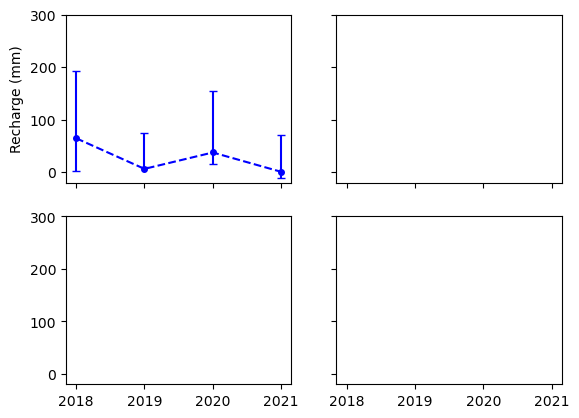

In [9]:

fmt_list=['bo--','co--','mo--','yo--']
ecolor_list=['b','c','m','y']
fig, axs = plt.subplots(2,2,sharex=True,sharey=True)

for i,fm,ec,ax,nn in zip(["1","4","5","6"],fmt_list,ecolor_list,axs.flatten(),[1,2,3,4]):
    #plt.close()
    
    
    df_rec_yearly_=df_rec_yearly
    df_rec_yearly_["Time"]=pd.to_datetime(df_rec_yearly.index)
    asymmetric_error = [df_rec_yearly_["REG_"+i+"_Rec"]-pd.Series(min_max_df_fig["min_"+i]),
                        pd.Series(min_max_df_fig["max_"+i]-df_rec_yearly_["REG_"+i+"_Rec"]) ]
    f=ax.errorbar([str(n) for n in df_rec_yearly_["Time"].dt.year], df_rec_yearly_["REG_"+i+"_Rec"] ,
                           yerr=asymmetric_error, fmt=fm,ecolor=ec,capsize=3,markersize=4,label="Region "+i)
    
        #min_max_df[["min_REG_"+i+"_Prec","max_REG_"+i+"_Prec"]].plot(kind='line',ax=ax)
        #df_rec_yearly["REG_"+i+"_Rec"].plot(kind='line',ax=ax)
    #ax.set_title('Annual recharge estimation')
    
    if nn in [1,3]: ax.set_ylabel("Recharge (mm)")
    if nn in [3,4]:ax.set_xlabel("Time")
    ax.set_ylim(-20,300)
    #extraticks=[100]
    plt.subplot(2,2, n).set_yticks([0,100,200,300] )
    font = {'family':'Verdana','size': 10}
    plt.rc('font', **font)    
    print (i)
    ax.legend()
    #minor=True
left, width = -0.04, .5
bottom, height = -0.15, .5
for n,ls in enumerate(["a.","b.","c.","d."]):
    fig.text(left, bottom, ls,
    horizontalalignment='left',
    verticalalignment='bottom',transform=plt.subplot(2,2, n+1).transAxes,style='italic', weight='bold')

#plt.subplots(2,2,2).xticks(rotation=20)

fig.set_figwidth(10)
fig.set_figheight(3)
fig.tight_layout()
plt.savefig(os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript\synth_example_figs","annual_rec_2stdw.png"),dpi=600)
plt.show()




In [ ]:
ax.get_yticks()

array([-200.,    0.,  200.,  400.,  100.,  100.,  100.,  100.])

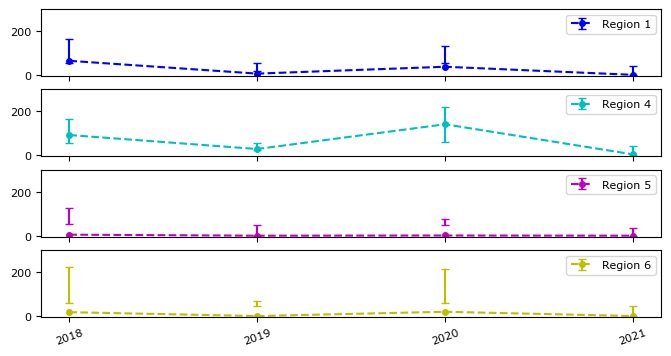

In [ ]:

fmt_list=['bo--','co--','mo--','yo--']
ecolor_list=['b','c','m','y']
fig, axs = plt.subplots(4,1,sharex=True,sharey=True)
for i,fm,ec,ax in zip(["1","4","5","6"],fmt_list,ecolor_list,axs):
    #plt.close()

    
    df_rec_yearly_=df_rec_yearly
    df_rec_yearly_["Time"]=pd.to_datetime(df_rec_yearly.index)
    asymmetric_error = [df_rec_yearly_["REG_"+i+"_Rec"]-pd.Series(min_max_df["min_"+i]),
                        pd.Series(min_max_df["max_"+i]-df_rec_yearly_["REG_"+i+"_Rec"]) ]
    f=ax.errorbar([str(n) for n in df_rec_yearly_["Time"].dt.year], df_rec_yearly_["REG_"+i+"_Rec"] , yerr=asymmetric_error, fmt=fm,ecolor=ec,capsize=3,markersize=4,label="Region "+i)
    
        #min_max_df[["min_REG_"+i+"_Prec","max_REG_"+i+"_Prec"]].plot(kind='line',ax=ax)
        #df_rec_yearly["REG_"+i+"_Rec"].plot(kind='line',ax=ax)
    #ax.set_title('Annual recharge estimation')
    #ax.set_xlabel("Time")
    #ax.set_ylabel("Recharge (mm)")
    ax.set_ylim(-5,300)
    font = {'family':'Verdana','size': 8}
    plt.rc('font', **font)    
    ax.legend()
    plt.xticks(rotation=20)
    
fig.set_figwidth(8)
fig.set_figheight(4)

#plt.show()
plt.savefig(os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript\synth_example_figs","annual_rec_max_min.png"),dpi=600)



In [ ]:
ls=[]
for i in [0,1,2,3,4,5]:    
    mean_=empirical_recharge_all[cols_list[i]].mean(axis=1)
    std_=empirical_recharge_all[cols_list[i]].std(axis=1)
    min_=empirical_recharge_all[cols_list[i]].min(axis=1)
    max_=empirical_recharge_all[cols_list[i]].max(axis=1)

    onereg=pd.concat([df_rec_yearly['REG_'+str(i+1)+'_Rec'],min_,max_,std_,mean_],axis=1)
    onereg=onereg.rename(columns={0: "Minimum",1:"Maximum",2:"Standard deviation",3:"Mean",'REG_'+str(i+1)+'_Rec':"WaterpyBal Estimation"}) 
    onereg["Time"]= pd.to_datetime(onereg.index).year.astype(str)
    onereg["region"]=str(i+1)
    #onereg.set_index([onereg.index,"region"],inplace=True)
    #print(onereg)
    ls.append(onereg)
    '''if i==0:
        stats_table=onereg
    else:
        stats_table=pd.concat([stats_table,onereg],axis=0,keys=onereg["region"])'''
        #stats_table=pd.merge(left=stats_table,right=onereg,how='left')
a=pd.concat(ls)
a.set_index(["Time","region"])
#stats_table.set_index(["Time","region"],inplace=True)
a.to_excel((os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript","stats_table_new.xls")))
#stats_table

c:\Users\Ash kan\.conda\envs\pysplitenv\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.


In [ ]:
from sklearn.metrics import r2_score
df_feats_prec=[ "1_emp4" ,     "2_emp4" ,     "3_emp4"  ,    "4_emp4"    , "5_emp4", "6_emp4" ]
df_feats_rec=["REG_1_Rec","REG_2_Rec","REG_3_Rec","REG_4_Rec","REG_5_Rec","REG_6_Rec"]
r2_list=[]
for i,j in zip(df_feats_rec,df_feats_prec):
    r2=r2_score(df_rec_yearly[i],empirical_recharge[j])
    r2_list.append(r2)
r2=pd.DataFrame(r2_list,columns=["r2"],index=[1,2,3,4,5,6])
r2=r2*100
empirical_errors=pd.concat([empirical_errors,r2],axis=1)


In [ ]:
empirical_errors

,RMSE_emp1,MAE_emp1,MAP_emp1,RMSE_emp2,MAE_emp2,MAP_emp2,RMSE_emp3,MAE_emp3,MAP_emp3,RMSE_emp4,MAE_emp4,MAP_emp4,r2
1,426.900624,25.774468,77.566721,543.047646,28.888841,58.224113,254.663488,20.289209,85.195303,1120.246100,46.867937,71.284235,-238.999975
2,191118.155851,617.347411,2036.244543,211395.350317,643.022359,989.736669,219648.997168,655.042672,1222.188270,187422.897930,608.037946,672.443957,-3004.249027
3,23567.094034,211.123639,659.578963,34562.752385,237.195021,339.985390,38026.272173,249.225451,439.959866,24317.826593,202.012632,195.879157,-201.330769
4,176.154222,16.068182,158.351449,872.931706,37.606253,64.049191,1175.902614,41.715727,81.148385,643.472612,32.384573,45.395584,55.542030
5,1019.688579,40.153389,97.881149,1277.224719,49.783088,97.821476,1.740590,1.559356,118.379222,1309.071431,48.499717,98.069847,-71884.762946
6,41.278492,7.815932,67.383406,1377.252836,52.205957,87.536807,37.820148,8.573640,106.579588,2104.183319,62.003015,90.575369,-4779.795765


In [ ]:
df_rec_yearly

,REG_1_Rec,REG_2_Rec,REG_3_Rec,REG_4_Rec,REG_5_Rec,REG_6_Rec,Time
Time,,,,,,,
2018-12-31,64.588102,793.169076,425.405133,92.520957,4.614975,17.558043,2018-12-31
2019-12-31,6.289575,598.108795,198.818875,28.813595,0.000000,0.000000,2019-12-31
2020-12-31,37.522238,841.382642,432.527768,141.525265,0.855535,19.487894,2020-12-31
2021-12-31,0.704579,602.253413,154.854721,4.425444,0.000000,0.000000,2021-12-31


In [ ]:
plt.close()
# gca stands for 'get current axis'
empirical_errors_no_urban=empirical_errors.drop([2,3])

#ax = plt.gca()
#df_prec_yearly["Time"]=df_prec_yearly.index
#df_rec_yearly["Time"]=df_rec_yearly.index
empirical_errors_no_urban["region"]=["1","4","5","6"]
empirical_errors_no_urban.plot(kind='line',x="region",y=["MAE_emp1","MAE_emp2","MAE_emp3","MAE_emp4"],ax=ax)

#plt.errorbar(empirical_errors_no_urban["region"],y=empirical_errors_no_urban[["MAE_emp1","MAE_emp2","MAE_emp3","MAE_emp4"]],yerr=0.2)
#df_rec_yearly.plot(kind='line',ax=ax,linestyle="dashed")

plt.show()

In [ ]:
plt.close()
# gca stands for 'get current axis'
#empirical_errors_no_urban=empirical_errors.drop([2,3])
#ax = plt.gca()
#df_prec_yearly["Time"]=df_prec_yearly.index
#df_rec_yearly["Time"]=df_rec_yearly.index
#empirical_errors_no_urban["region"]=[1,4,5,6]
#empirical_errors_no_urban.plot(kind='line',x="region",y=["MAP_emp1","MAP_emp2","MAP_emp3","MAP_emp4"],ax=ax)
empirical_errors_no_urban.plot(kind='line',x="region",y=["MAP_emp1","MAP_emp2","MAP_emp4","MAP_emp3","r2"],ax=ax)

#plt.errorbar(x=np.arange(len(empirical_errors_no_urban)),y=["MAE_emp1","MAE_emp2","MAE_emp3","MAE_emp4"])
#df_rec_yearly.plot(kind='line',ax=ax,linestyle="dashed")

plt.show()
empirical_errors_no_urban["r2"]

1     -238.999975
4       55.542030
5   -71884.762946
6    -4779.795765
Name: r2, dtype: float64

In [11]:
dir_mod_input=r"C:\Users\Ash kan\Documents\watbalpy\waterball_test\modelito_for_paper_tests\METEO_9stations.csv"
dfin=pd.read_csv(dir_mod_input)
dfin=dfin[["NOMBRE","time","Prec_Val","tmean"]]
dfin.time=pd.to_datetime(dfin.time)
dfin=dfin.set_index(["time","NOMBRE"])

#fig.plot

In [32]:
n=dfin.groupby(level=0).mean()
n.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='time', freq=None)

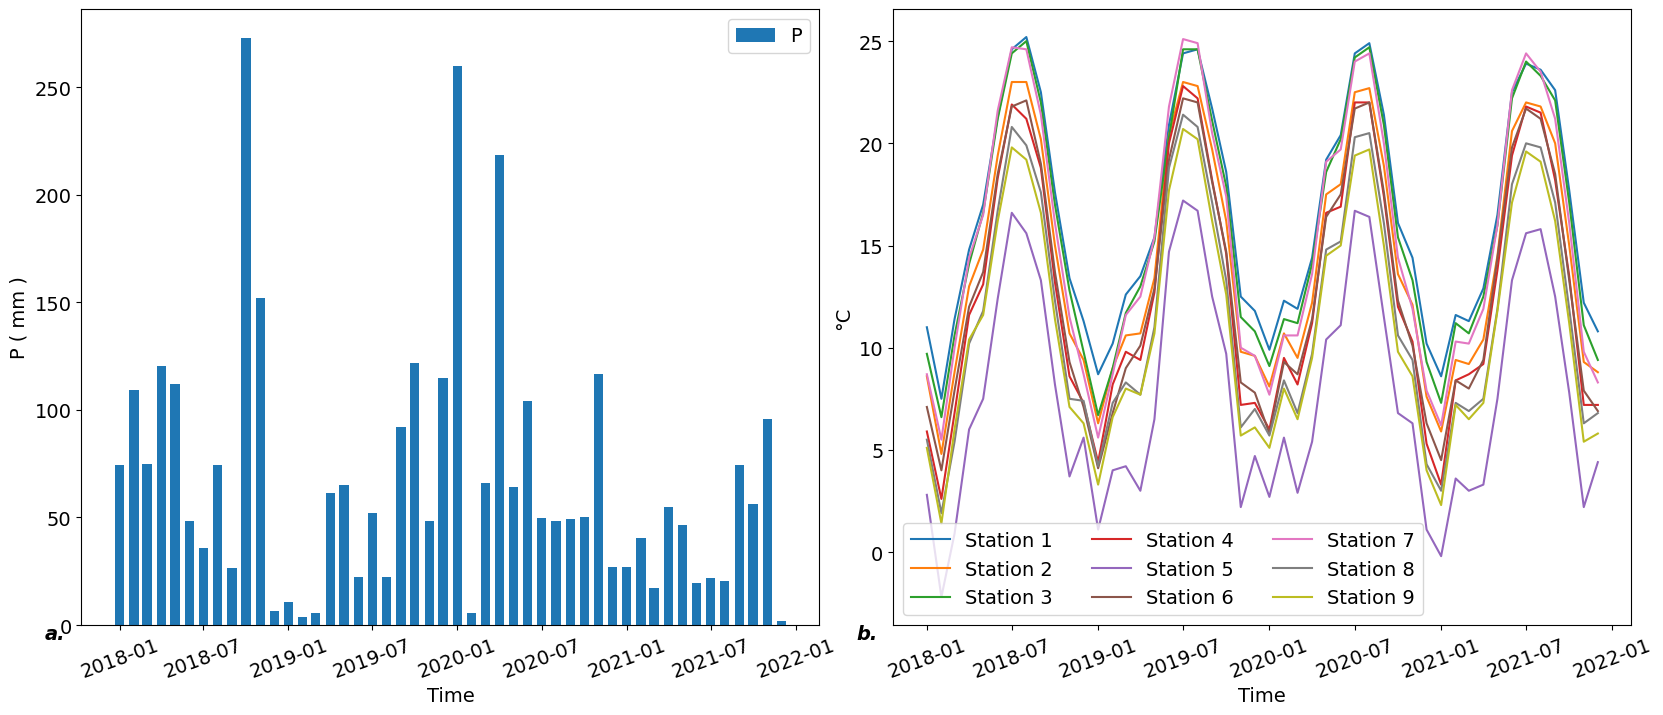

In [50]:
fig, axs = plt.subplots(1,2)
'''for nu,station in zip([1,2,3,4,5,6,7,8,9],list(dfin.index.get_level_values('NOMBRE').unique())):
    n=dfin[dfin.index.get_level_values('NOMBRE')==station]
    n=n.set_index(n.index.get_level_values("time"))
    plt.subplot(1,2, 1).plot(n["Prec_Val"],label="Station "+ str(nu))
    plt.legend(fontsize=16)
    plt.subplot(1,2, 1).set_xlabel("Time")
    plt.subplot(1,2, 1).set_ylabel("P ( mm )")
    plt.xticks(rotation=20)'''
n=dfin.groupby(level=0).mean()
#n=n.set_index(n.index.get_level_values("time"))
plt.subplot(1,2, 1).bar(n.index,n["Prec_Val"],label="P",width=20)
plt.legend()
plt.subplot(1,2, 1).set_xlabel("Time")
plt.subplot(1,2, 1).set_ylabel("P ( mm )")
plt.xticks(rotation=20)

for nu,station in zip([1,2,3,4,5,6,7,8,9],dfin.index.get_level_values('NOMBRE').unique()):
    n=dfin[dfin.index.get_level_values('NOMBRE')==station]
    n=n.set_index(n.index.get_level_values("time"))
    plt.subplot(1,2, 2).plot(n["tmean"],label="Station "+ str(nu))
    plt.legend(loc=3,ncol=3)
    plt.subplot(1,2, 2).set_xlabel("Time")
    plt.subplot(1,2, 2).set_ylabel(u'\N{DEGREE SIGN}' +"C")
    plt.xticks(rotation=20)
left, width = -0.05, .5
bottom, height = -0.03, .5
plt.subplot(1,2, 1).text(left, bottom, 'a.',
        horizontalalignment='left',
        verticalalignment='bottom',transform=plt.subplot(1,2, 1).transAxes,style='italic', weight='bold')
plt.subplot(1,2, 2).text(left, bottom, 'b.',
        horizontalalignment='left',
        verticalalignment='bottom',transform=plt.subplot(1,2, 2).transAxes,style='italic', weight='bold')
#fig.tight_layout()
fig.subplots_adjust(
                    wspace=0.1,
                    hspace=0.1)
fig.set_figwidth(20)
fig.set_figheight(8)
font = {'size'   : 14}

plt.rc('font', **font)
plt.savefig(os.path.join(r"C:\Users\Ash kan\Desktop\waterpybal\waterpybal manuscript\synth_example_figs","inputdata.png"),dpi=600)
